In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split

np.random.seed(11)

In [2]:
attributes = pd.read_csv('list_attr_celeba.csv', index_col=0)
attributes

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
image_id,,,,,,,,,,,,,,,,,,,,,
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1


In [3]:
attributes=attributes.replace(-1,0)

Text(0.5, -159.375, 'Attribute')

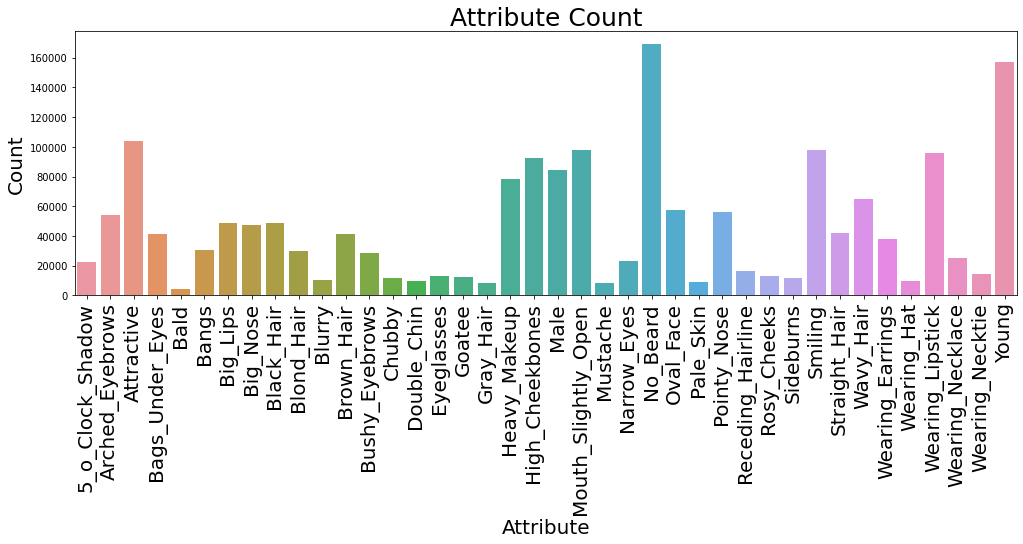

In [4]:
atts = list(attributes.columns.values)
plt.figure(figsize=(14,7))
ax= sns.barplot(x=atts, y=attributes.iloc[:,:].sum().values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
plt.tight_layout()
plt.title("Attribute Count", fontsize=25)
plt.ylabel('Count', fontsize=20)
plt.xlabel('Attribute', fontsize=20)

Escogi las clases mas balanceadas sin tomar attractive, Heavy Makeup ni High Cheeckbones (me parecieron subjetivas).

Saque un sample del 20% y quite las hileras donde no habia ningun positivo, obteniendo un dataset bastante balanceado.

In [5]:
attributes = attributes[['Male','Mouth_Slightly_Open','Smiling','Wearing_Lipstick']]
attributes = attributes.sample(frac=.2)
attributes = attributes[attributes.sum(axis=1) > 0]
attributes

,Male,Mouth_Slightly_Open,Smiling,Wearing_Lipstick
image_id,,,,
011736.jpg,1,1,1,0
096690.jpg,1,1,1,0
056331.jpg,0,1,1,1
030445.jpg,0,1,0,1
135417.jpg,1,0,0,0
...,...,...,...,...
190108.jpg,1,0,0,0
073846.jpg,0,1,1,1
095328.jpg,0,1,1,0


Text(0.5, 17.796875, 'Attribute')

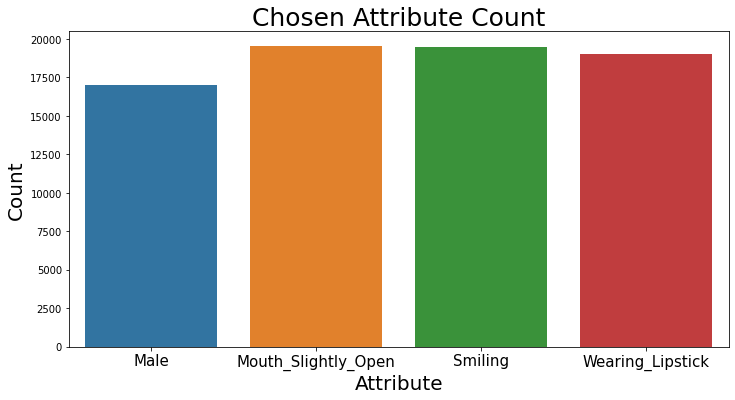

In [6]:
atts = list(attributes.columns.values)
plt.figure(figsize=(10,5))
ax= sns.barplot(x=atts, y=attributes.iloc[:,:].sum().values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=15)
plt.tight_layout()
plt.title("Chosen Attribute Count", fontsize=25)
plt.ylabel('Count', fontsize=20)
plt.xlabel('Attribute', fontsize=20)

In [7]:
imglist = attributes.index.tolist()

In [8]:
x = []
for name in imglist:
    im = cv2.imread('img_align_celeba/'+name)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im = cv2.resize(im, dsize=(89,109))
    im = im.reshape(im.shape[0],im.shape[1] , 1)/255
    x.append(im)
x = np.array(x)

In [9]:
attributes = attributes.reset_index(drop=True)

In [10]:
#1 ejemplo de cada clase
male = attributes.loc[attributes['Male'] == 1].sample(n=1).index[0]
mouth = attributes.loc[attributes['Mouth_Slightly_Open'] == 1].sample(n=1).index[0]
smiling = attributes.loc[attributes['Smiling'] == 1].sample(n=1).index[0]
lipstick = attributes.loc[attributes['Wearing_Lipstick'] == 1].sample(n=1).index[0]

(-0.5, 88.5, 108.5, -0.5)

<Figure size 720x720 with 0 Axes>

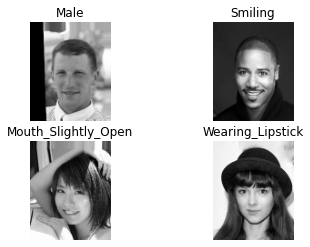

In [11]:
plt.figure(figsize=(10,10))
f, axarr = plt.subplots(2,2) 
axarr[0,0].imshow(x[male], cmap='gray')
axarr[0,0].set_title("Male")
axarr[0,0].axis('off')
axarr[1,0].imshow(x[mouth], cmap='gray')
axarr[1,0].set_title("Mouth_Slightly_Open")
axarr[1,0].axis('off')
axarr[0,1].imshow(x[smiling], cmap='gray')
axarr[0,1].set_title("Smiling")
axarr[0,1].axis('off')
axarr[1,1].imshow(x[lipstick], cmap='gray')
axarr[1,1].set_title("Wearing_Lipstick")
axarr[1,1].axis('off')

In [12]:
y = attributes.values

In [13]:
y.shape

(38365, 4)

In [14]:
x.shape

(38365, 109, 89, 1)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, Flatten, Conv2D, Dropout)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same',
                 input_shape=(109, 89, 1)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='sigmoid'))

model.compile(optimizer='Adam', 
              loss="BinaryCrossentropy", metrics=["BinaryAccuracy"])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=1, save_best_only=True)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=11)

In [17]:
history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=7,
          validation_split = 0.1,
          callbacks = [checkpointer],
          verbose=1)

Epoch 1/7
243/243 [==============================] - ETA: 0s - loss: 0.6097 - binary_accuracy: 0.6878
Epoch 00001: val_loss improved from inf to 0.26849, saving model to model.h5
243/243 [==============================] - 760s 3s/step - loss: 0.6097 - binary_accuracy: 0.6878 - val_loss: 0.2685 - val_binary_accuracy: 0.8878
Epoch 2/7
243/243 [==============================] - ETA: 0s - loss: 0.2379 - binary_accuracy: 0.9031
Epoch 00002: val_loss improved from 0.26849 to 0.23166, saving model to model.h5
243/243 [==============================] - 801s 3s/step - loss: 0.2379 - binary_accuracy: 0.9031 - val_loss: 0.2317 - val_binary_accuracy: 0.9032
Epoch 3/7
243/243 [==============================] - ETA: 0s - loss: 0.1857 - binary_accuracy: 0.9256
Epoch 00003: val_loss improved from 0.23166 to 0.22166, saving model to model.h5
243/243 [==============================] - 746s 3s/step - loss: 0.1857 - binary_accuracy: 0.9256 - val_loss: 0.2217 - val_binary_accuracy: 0.9073
Epoch 4/7
243/243

In [18]:
from tensorflow.keras.models import load_model
best_model = load_model('model.h5')
best_model.evaluate(x_test, y_test)

120/120 [==============================] - 20s 166ms/step - loss: 0.2139 - binary_accuracy: 0.9143


[0.2138693779706955, 0.9143210649490356]

In [19]:
y_pred = best_model.predict(x_test)

In [20]:
y_pred = (y_pred > .5).astype(int) 
y_pred

array([[0, 0, 0, 1],
       [0, 0, 1, 1],
       [0, 1, 1, 1],
       ...,
       [1, 0, 0, 0],
       [1, 1, 0, 0],
       [0, 1, 1, 1]])

In [21]:
y_test

array([[0, 0, 0, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 1],
       ...,
       [1, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 1]], dtype=int64)

In [22]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1721
           1       0.89      0.84      0.87      1981
           2       0.90      0.91      0.90      1930
           3       0.91      0.95      0.93      1865

   micro avg       0.91      0.91      0.91      7497
   macro avg       0.92      0.91      0.91      7497
weighted avg       0.91      0.91      0.91      7497
 samples avg       0.91      0.91      0.89      7497

C:\Users\eric8\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
def plot_matrix(cm, ax, att):
    heatmap = sns.heatmap(cm, annot=True, ax=ax)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.set_title(att)

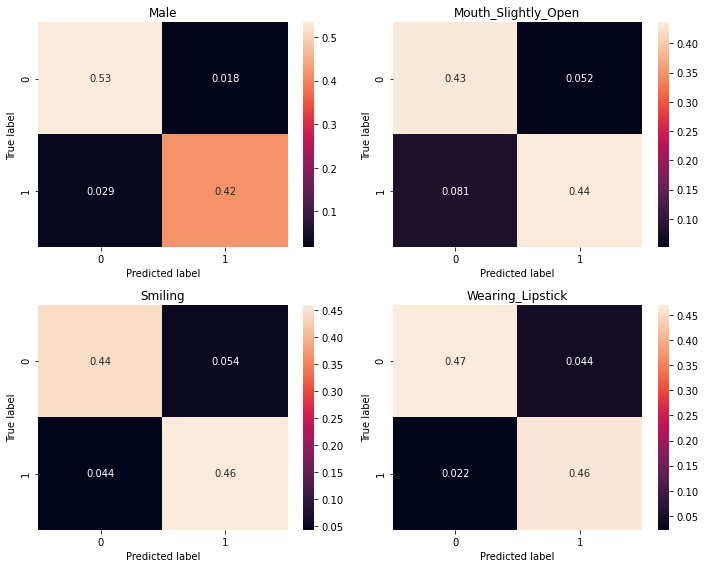

In [26]:
cm = multilabel_confusion_matrix(y_test, y_pred)/len(y_test)
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
for matrix, ax, att in zip(cm, ax.flatten(), atts):
    plot_matrix(matrix, ax, att)
    
fig.tight_layout()
plt.show()

La mejor accuracy se obtuvo distinguiendo hombres y mujeres (95%) y el peor en mouth slightly open (87%).

Test accuracy 91.43%